In [2]:
import pandas as pd




In [3]:
import numpy as np 

In [4]:
import matplotlib.pyplot as plt 

In [5]:
import seaborn as sns 

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
# importing modules and packages

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from sklearn import preprocessing
%matplotlib inline

In [7]:
df = pd.read_csv('Plane2.csv')
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24-03-2019,Banglore,New Delhi,BLR → DEL,22:20,22-03-2022 01:10,2h 50m,non-stop,No info,3897.0
1,Air India,01-05-2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0
2,Jet Airways,09-06-2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,10-06-2022 04:25,19h,2 stops,No info,13882.0
3,IndiGo,12-05-2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0
4,IndiGo,01-03-2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = df.dropna()

In [12]:
df = df.drop(['Arrival_Time'], axis = 1)

In [13]:
df['Source'].value_counts()

Delhi       226
Banglore    115
Kolkata     110
Chennai      28
Mumbai       20
Name: Source, dtype: int64

In [14]:

df['Destination'].value_counts()

Cochin       226
Banglore     110
Delhi         68
New Delhi     47
Kolkata       28
Hyderabad     20
Name: Destination, dtype: int64

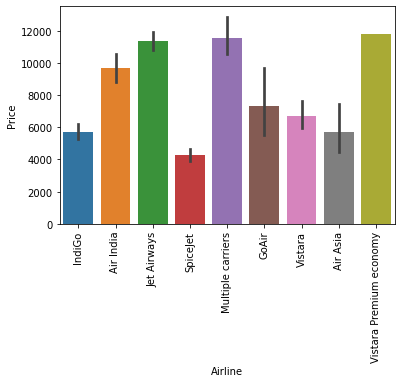

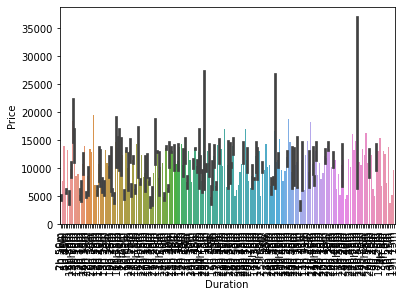

In [15]:
sns.barplot(data=df, x = 'Airline', y='Price')
plt.xticks(rotation = 90)
plt.show()


sns.barplot(data = df, x = 'Duration', y = 'Price')
plt.xticks(rotation = 90)
plt.show()





In [16]:
df['Duration'] = df['Duration'].str.replace('h', '*60').str.replace(' ', '+').str.replace('m', '*1').apply(eval)


In [17]:
df['Duration']

0       170
1       445
2      1140
3       325
4       285
       ... 
494     315
495    1155
496     450
497     540
498    1440
Name: Duration, Length: 499, dtype: int64

In [18]:

df['Date_of_Journey'] = pd.to_datetime(df['Date_of_Journey'])

In [19]:
df['Date_of_Journey']

0     2019-03-24
1     2019-01-05
2     2019-09-06
3     2019-12-05
4     2019-01-03
         ...    
494   2019-03-21
495   2019-06-05
496   2019-06-06
497   2019-01-04
498   2019-05-15
Name: Date_of_Journey, Length: 499, dtype: datetime64[ns]

In [20]:


#to label encode Airline, Source, Destination, Day 

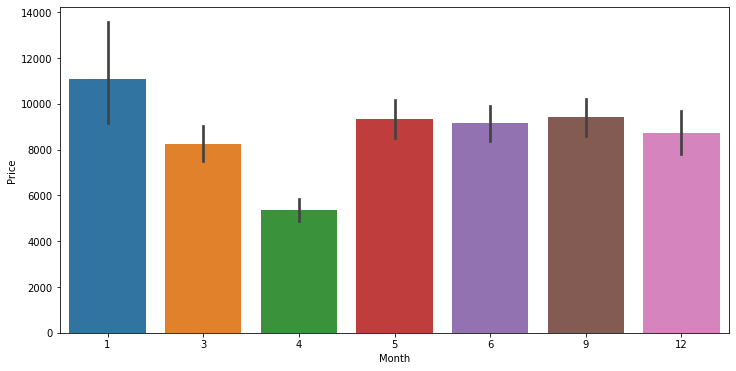

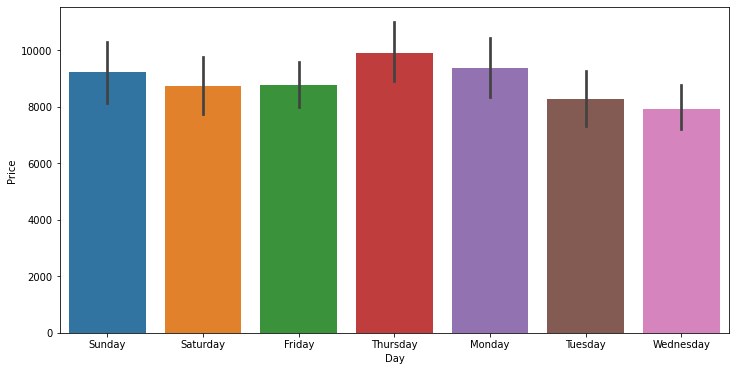

In [21]:
df['Month'] = df['Date_of_Journey'].dt.month

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Month', y='Price')
plt.show()

df['Day'] = df['Date_of_Journey'].dt.day_name()

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Day', y='Price')
plt.show()







In [22]:
categ = ['Airline', 'Source', 'Destination', 'Day','Total_Stops', 'Additional_Info','Route','Dep_Time']

# Encode Categorical Columns
le = LabelEncoder()
label_df = df[categ].apply(le.fit_transform)

In [23]:
label_df

,Airline,Source,Destination,Day,Total_Stops,Additional_Info,Route,Dep_Time
0,3,0,5,3,3,2,6,149
1,1,3,0,2,1,2,23,17
2,4,2,1,0,1,2,45,47
3,3,3,0,4,0,2,27,114
4,3,0,5,4,0,2,9,103
...,...,...,...,...,...,...,...,...
494,1,2,1,4,0,2,33,111
495,4,3,0,6,0,0,15,79
496,4,2,1,4,0,2,34,138
497,4,2,1,0,0,0,34,53


In [24]:
new_df = df[[ 'Duration', 'Month', 'Price']]

In [25]:
new_df

,Duration,Month,Price
0,170,3,3897.0
1,445,1,7662.0
2,1140,9,13882.0
3,325,12,6218.0
4,285,1,13302.0
...,...,...,...
494,315,3,5704.0
495,1155,6,9663.0
496,450,6,14714.0
497,540,1,5406.0


In [26]:
final_df = pd.concat([ label_df,new_df], axis="columns")


In [27]:
final_df

,Airline,Source,Destination,Day,Total_Stops,Additional_Info,Route,Dep_Time,Duration,Month,Price
0,3,0,5,3,3,2,6,149,170,3,3897.0
1,1,3,0,2,1,2,23,17,445,1,7662.0
2,4,2,1,0,1,2,45,47,1140,9,13882.0
3,3,3,0,4,0,2,27,114,325,12,6218.0
4,3,0,5,4,0,2,9,103,285,1,13302.0
...,...,...,...,...,...,...,...,...,...,...,...
494,1,2,1,4,0,2,33,111,315,3,5704.0
495,4,3,0,6,0,0,15,79,1155,6,9663.0
496,4,2,1,4,0,2,34,138,450,6,14714.0
497,4,2,1,0,0,0,34,53,540,1,5406.0


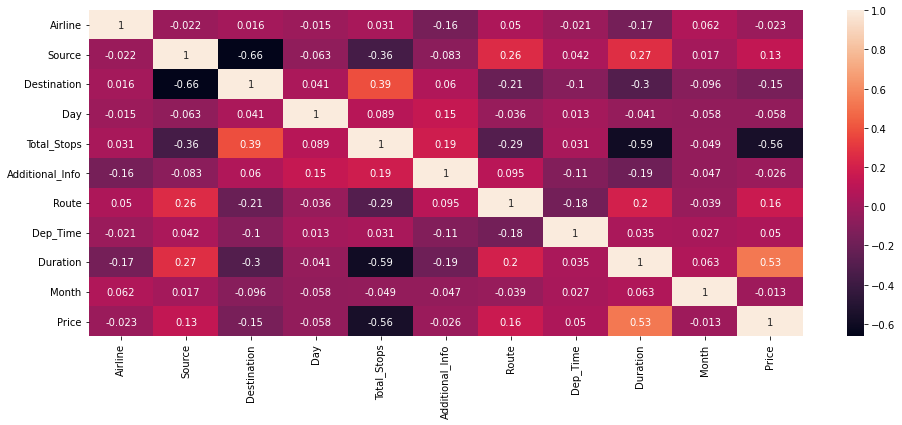

In [28]:
plt.figure(figsize=(16, 6))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

In [29]:

final_df.to_csv('Ticket10.csv')